In [1]:
# pip install torch 
# torch is working with tensors - 4+
# dimensional matrices

import pandas as pd
import torch

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_35178/2968245261.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [4]:
import torch.nn as nn
import torch.nn.functional as F # functional has the activation functions

#create tensors from the data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)


tensor([[  7.0000, 184.0000,  84.0000,  ...,  35.5000,   0.3550,  41.0000],
        [  6.0000,  85.0000,  78.0000,  ...,  31.2000,   0.3820,  42.0000],
        [  2.0000, 106.0000,  64.0000,  ...,  30.5000,   1.4000,  34.0000],
        ...,
        [  1.0000,  97.0000,  70.0000,  ...,  38.1000,   0.2180,  30.0000],
        [  6.0000, 190.0000,  92.0000,  ...,  35.5000,   0.2780,  66.0000],
        [  4.0000, 144.0000,  58.0000,  ...,  29.5000,   0.2870,  37.0000]])


In [8]:
# artificial neural network
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [9]:
torch.manual_seed(42)

# create an instance of the model
ann = ANN_Model()

In [10]:
# loss function 
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)


In [11]:
# run model through various epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() # working to minimize the loss function using backward propagation
    optimizer.step() # perform one optimization step each function

Epoch number: 1 with loss 0.7325447201728821
Epoch number: 11 with loss 0.6600155830383301
Epoch number: 21 with loss 0.6357854604721069
Epoch number: 31 with loss 0.6232737302780151
Epoch number: 41 with loss 0.6109457612037659
Epoch number: 51 with loss 0.5912511348724365
Epoch number: 61 with loss 0.5709356665611267
Epoch number: 71 with loss 0.549248218536377
Epoch number: 81 with loss 0.5332964658737183
Epoch number: 91 with loss 0.5167083740234375
Epoch number: 101 with loss 0.5048837661743164
Epoch number: 111 with loss 0.4881722033023834
Epoch number: 121 with loss 0.4804435670375824
Epoch number: 131 with loss 0.4685401916503906
Epoch number: 141 with loss 0.45855170488357544
Epoch number: 151 with loss 0.4493770897388458
Epoch number: 161 with loss 0.4355601668357849
Epoch number: 171 with loss 0.42657962441444397
Epoch number: 181 with loss 0.4182165265083313
Epoch number: 191 with loss 0.4182041585445404
Epoch number: 201 with loss 0.4039553105831146
Epoch number: 211 with 

In [12]:
# predictions
y_pred = []

with torch.no_grad(): # this will decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
        # returns the index with the max
        # element in each position set

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

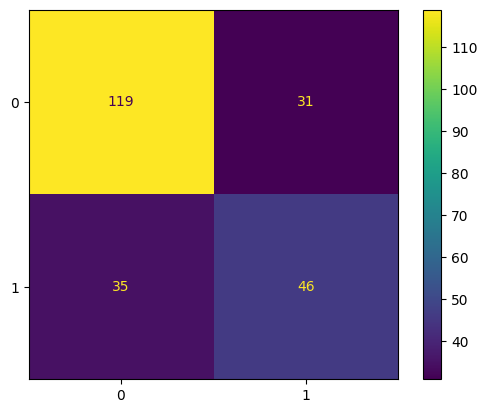

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)